In [35]:
#dependencies
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns

In [36]:
#loading data
df = pd.read_csv('heart.csv')
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [37]:
#missing value checking
df.isnull().values.any()

False

In [38]:
#number of row and column
df.shape

(303, 14)

In [39]:
#target column having healthy(0) and unhealthy(1)
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [40]:
#My own calculations
#percent_dont_have_disease = 48/(147+48)*100
#percent_has_disease = 147/(147+48)*100
#print('Guess for not having Parkinsons disease, I would be correct',percent_dont_have_disease,'% of the time.')
#print('Guess for having Parkinsons disease, I would be correct',percent_has_disease,'% of the time.')

C:\Users\User\anaconda3\envs\tf\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='target', ylabel='count'>

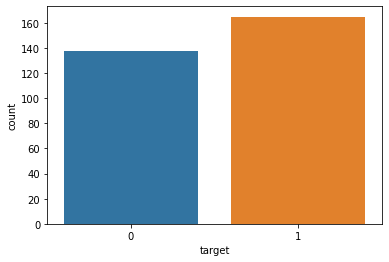

In [41]:
#visualize the count
sns.countplot(df['target'])

In [42]:
#know the datatypes
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [43]:
#create the feature dataset
x = df.drop(['sex','age'],1)
x = np.array(x.drop(['target'],1))
#create the target dataset
y = np.array(df['target'])

In [44]:
#split the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [45]:
#transform the feature data to be values between 0 and 1
sc = MinMaxScaler(feature_range = (0,1))
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [46]:
#XGBoosting classifier
model = XGBClassifier().fit(x_train, y_train)

In [47]:
#model predictions
predictions = model.predict(x_test)
predictions

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0], dtype=int64)

In [48]:
y_test

array([0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0], dtype=int64)

In [49]:
#models accuracy, precision, recall, F1-score
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80        31
           1       0.78      0.83      0.81        30

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61

